In [5]:
from class_ai import Temperature_Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [6]:
data = pd.read_excel("cleandata.xlsx", sheet_name=None)
tp = Temperature_Data(data)
years = tp.years
years = years[::-1]

In [7]:
std_single_days = []
avgtemp_single_days = []
month = 4
num_days = calendar.monthrange(2009, month)[1]
for day in np.arange(1,num_days+1):
    temps = tp.collect_day(month,day,0)[::-1]
    avgtemp_single_days.append(np.mean(temps))
    std_single_days.append(np.std(temps))
print("Completed.")

Completed.


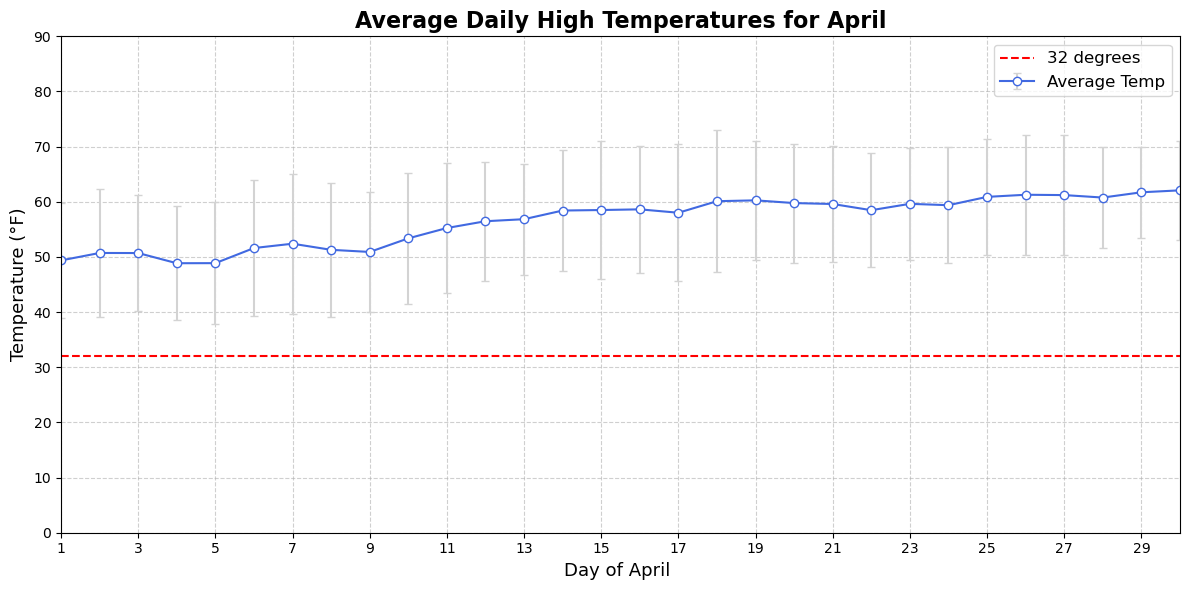

In [9]:
month_list = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]

x = np.arange(1, num_days + 1)
y = avgtemp_single_days
error = std_single_days

plt.figure(figsize=(12, 6))

# Plot with error bars
plt.errorbar(
    x, y, yerr=error, fmt='o-', color='royalblue', ecolor='lightgray',
    elinewidth=1.5, capsize=3, markerfacecolor='white', label='Average Temp'
)

# Plot freeze line
plt.plot(x,np.ones(len(y))*32,'r--',label="32 degrees")

# Title and axis labels
plt.title(f"Average Daily High Temperatures for {month_list[month-1]}", fontsize=16, weight='bold')
plt.xlabel(f"Day of {month_list[month-1]} ", fontsize=13)
plt.ylabel("Temperature (°F)", fontsize=13)

# Grid and axis formatting
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(1, num_days)
plt.ylim(0, 90)  # Add padding on top
plt.xticks(np.arange(1, num_days + 1, 2))  # Tick every other day for readability

# Legend and layout
plt.legend(fontsize=12, frameon=True)
plt.tight_layout()
plt.show()